In [1]:
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence

import pandas as pd
import numpy as np
import random

from RoadDataset import RoadDataset
from MultiRoadDataset import MultiRoadDataset

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_datasets_path = "../notebooks/datasets/train/"
sub_dirs = os.listdir(train_datasets_path)
train_dataset_paths = [[train_datasets_path + sub_dir + "/" + sub_dir + ".csv", train_datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
train_dataset_paths

[['../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/frames/'],
 ['../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv',
  '../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/frames/'],
 ['../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv',
  '../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/frames/'],
 ['../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv',
  '../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 

In [4]:
val_datasets_path = "../notebooks/datasets/validation/"
sub_dirs = os.listdir(val_datasets_path)
val_dataset_paths = [[val_datasets_path + sub_dir + "/" + sub_dir + ".csv", val_datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
val_dataset_paths

[['../notebooks/datasets/validation/Tag-Sonne-Wolken-Ausserorts/Tag-Sonne-Wolken-Ausserorts.csv',
  '../notebooks/datasets/validation/Tag-Sonne-Wolken-Ausserorts/frames/'],
 ['../notebooks/datasets/validation/Nacht-Schneechaos/Nacht-Schneechaos.csv',
  '../notebooks/datasets/validation/Nacht-Schneechaos/frames/']]

In [5]:
column_names = ['filename','steering_wheel_angle','speed', 'blink_l', 'blink_r', 'gps_long', 'gps_lat', 'gps_speed', 'gps_sats', 'swa_predicted', 'engaged']
my_batch_size = 16

In [6]:
print(train_dataset_paths[9])

['../notebooks/datasets/train/Fri May 28 20:31:32 2021/Fri May 28 20:31:32 2021.csv', '../notebooks/datasets/train/Fri May 28 20:31:32 2021/frames/']


In [7]:
multi_train_dataset = MultiRoadDataset(column_names, batch_size=my_batch_size)



for train_dataset_path in train_dataset_paths[:]:
    multi_train_dataset.addRoadDataset(train_dataset_path[0], train_dataset_path[1])
    

Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv
Loaded dataset with 8096 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv
Loaded dataset with 3775 samples
Reading csv file: ../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv
Failed to read csv file!
NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Loaded dataset with 0 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv
Loaded dataset with 7060 samples
Reading csv file: ../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv
Loaded dataset with 3112 samples
Reading csv file: ../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv
Loaded dataset with 17985 samples
Reading csv file: ../notebooks/datasets/train/

Loaded dataset with 12578 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_01_50 2020/Sun Dec 27 18_01_50 2020.csv
Loaded dataset with 5315 samples
Reading csv file: ../notebooks/datasets/train/Sun Feb 21 21:50:27 2021/Sun Feb 21 21:50:27 2021.csv
Loaded dataset with 16015 samples
Reading csv file: ../notebooks/datasets/train/Sun Feb 21 21:51:46 2021/Sun Feb 21 21:51:46 2021.csv
Failed to read csv file!
NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Loaded dataset with 0 samples
Reading csv file: ../notebooks/datasets/train/Mon May 17 14:02:28 2021/Mon May 17 14:02:28 2021.csv
Loaded dataset with 17017 samples
Reading csv file: ../notebooks/datasets/train/Thu May 20 17:37:46 2021/Thu May 20 17:37:46 2021.csv
Loaded dataset with 31219 samples
Reading csv file: ../notebooks/datasets/train/Sun Jan 10 11:31:15 2021/Sun Jan 10 11:31:15 2021.csv
Loaded dataset with 19259 samples
Reading c

In [8]:
stats = multi_train_dataset.get_csv().describe()
stats = stats.transpose()
print(stats)

                          count       mean           std           min  \
steering_wheel_angle  1083402.0  -1.233264     60.493478 -9.990000e+02   
speed                 1083402.0  67.139615     37.706743 -9.990000e+02   
blink_l               1083401.0   0.027981      0.164919  0.000000e+00   
blink_r               1083401.0   0.032876      0.178312  0.000000e+00   
gps_long               406688.0  47.881419      0.119271  4.770167e+01   
gps_lat                406688.0  11.790724      0.080897  1.156157e+01   
gps_speed              406688.0  62.742593     30.373604  0.000000e+00   
gps_sats               406688.0   7.624122      1.409831  0.000000e+00   
swa_predicted          406688.0 -54.729899  10469.835472 -5.063477e+06   

                            25%        50%        75%            max  
steering_wheel_angle  -3.880000  -0.380000   2.440000     501.620000  
speed                 42.904000  61.132000  88.102000     205.158000  
blink_l                0.000000   0.000000   0

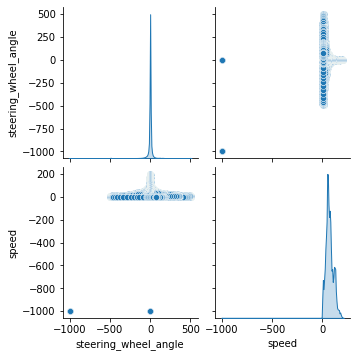

In [9]:
multi_train_dataset.pairplot()

In [10]:
len(multi_train_dataset)

67712

In [11]:
multi_train_dataset.clean()

Cleaning dataset. Starting with 8096 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 984 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 1292 rows for reason: Low speed (< 25 km/h)
Removing 125 rows for reason: Left blinker on
Removing 1 rows for reason: Right blinker on
5694 samples remaining.
Cleaning dataset. Starting with 3775 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 905 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 616 rows for reason: Low speed (< 25 km/h)
Removing 65 rows for reason: Left blinker on
Removing 138 rows for reason: Right blinker on
2051 samples remaining.
Cleaning dataset. Starting with 0 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 0 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 0 rows for reas

Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 1099 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 965 rows for reason: Low speed (< 25 km/h)
Removing 23 rows for reason: Left blinker on
Removing 35 rows for reason: Right blinker on
5622 samples remaining.
Cleaning dataset. Starting with 20770 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 1716 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 1038 rows for reason: Low speed (< 25 km/h)
Removing 269 rows for reason: Left blinker on
Removing 161 rows for reason: Right blinker on
17586 samples remaining.
Cleaning dataset. Starting with 15174 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 1271 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 277 rows for reason: Low speed (< 25 km/h)
Removi

Removing 185 rows for reason: Low speed (< 25 km/h)
Removing 405 rows for reason: Left blinker on
Removing 716 rows for reason: Right blinker on
9128 samples remaining.
Cleaning dataset. Starting with 17601 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 931 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 462 rows for reason: Low speed (< 25 km/h)
Removing 165 rows for reason: Left blinker on
Removing 56 rows for reason: Right blinker on
15987 samples remaining.
Cleaning dataset. Starting with 12578 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 1194 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 179 rows for reason: Low speed (< 25 km/h)
Removing 64 rows for reason: Left blinker on
Removing 69 rows for reason: Right blinker on
11072 samples remaining.
Cleaning dataset. Starting with 5315 samples.
Removing 0 rows

In [12]:
stats = multi_train_dataset.get_csv().describe()
stats = stats.transpose()
print(stats)

                         count       mean        std          min        25%  \
steering_wheel_angle  899138.0  -0.620918   9.895441   -44.950000  -3.010000   
speed                 899138.0  74.832895  32.509807    25.017000  50.003000   
blink_l               899137.0   0.000000   0.000000     0.000000   0.000000   
blink_r               899137.0   0.000000   0.000000     0.000000   0.000000   
gps_long              345437.0  47.882910   0.119658    47.701667  47.802295   
gps_lat               345437.0  11.790807   0.081907    11.561686  11.735679   
gps_speed             345437.0  67.941169  27.468158     3.900000  48.100000   
gps_sats              345437.0   7.598839   1.424406     0.000000   7.000000   
swa_predicted         345437.0  -1.369303  11.320874 -1066.706736  -4.197119   
engaged               314280.0   0.000000   0.000000     0.000000   0.000000   

                            50%        75%         max  
steering_wheel_angle  -0.380000   1.820000   44.950000  
speed

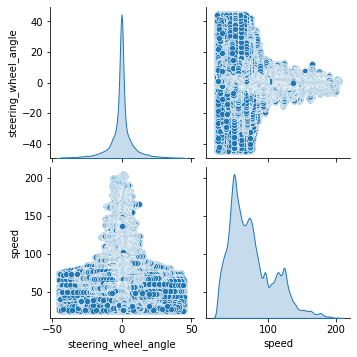

In [13]:
multi_train_dataset.pairplot()

In [14]:
multi_train_dataset.balance()

Balancing dataset (step 1). Starting with 5694 samples (Std. dev: 12.88275384555444)
1175 samples remaining after Balancing step 1 (Std. dev: 22.383642620442956)
Balancing dataset (step 2). Starting with 1175 samples
Mean: -1.8016170212765954)
1054 samples remaining after Balancing step 2
Mean: 0.11553130929791323)

Balancing dataset (step 1). Starting with 2051 samples (Std. dev: 18.48305125715824)
495 samples remaining after Balancing step 1 (Std. dev: 25.358803423262852)
Balancing dataset (step 2). Starting with 495 samples
Mean: 0.6849696969696972)
478 samples remaining after Balancing step 2
Mean: 0.013158995815899981)

Balancing dataset (step 1). Starting with 5474 samples (Std. dev: 13.335803999075434)
1170 samples remaining after Balancing step 1 (Std. dev: 22.520252648648825)
Balancing dataset (step 2). Starting with 1170 samples
Mean: 0.175)
1142 samples remaining after Balancing step 2
Mean: 0.016401050788091284)

Balancing dataset (step 1). Starting with 201 samples (Std. d

2469 samples remaining after Balancing step 1 (Std. dev: 21.220090534178883)
Balancing dataset (step 2). Starting with 2469 samples
Mean: 0.27021466180639947)
2328 samples remaining after Balancing step 2
Mean: -0.0593728522336765)

Balancing dataset (step 1). Starting with 32214 samples (Std. dev: 4.372741056983138)
2832 samples remaining after Balancing step 1 (Std. dev: 13.913111492910296)
Balancing dataset (step 2). Starting with 2832 samples
Mean: -1.2007168079096049)
2392 samples remaining after Balancing step 2
Mean: -0.040539297658862695)

Balancing dataset (step 1). Starting with 26532 samples (Std. dev: 9.568496044958682)
4491 samples remaining after Balancing step 1 (Std. dev: 19.23145694530391)
Balancing dataset (step 2). Starting with 4491 samples
Mean: -0.35076820307281203)
4326 samples remaining after Balancing step 2
Mean: -0.03202265372168289)

Balancing dataset (step 1). Starting with 12010 samples (Std. dev: 8.730759930330793)
1925 samples remaining after Balancing s

2850 samples remaining after Balancing step 1 (Std. dev: 22.44501531944334)
Balancing dataset (step 2). Starting with 2850 samples
Mean: 2.443336842105263)
2614 samples remaining after Balancing step 2
Mean: -0.0426740627390975)

Balancing dataset (step 1). Starting with 24266 samples (Std. dev: 11.302486463070421)
4721 samples remaining after Balancing step 1 (Std. dev: 21.48625912801546)
Balancing dataset (step 2). Starting with 4721 samples
Mean: -1.167614912094895)
4358 samples remaining after Balancing step 2
Mean: -0.029804956402019245)

Balancing dataset (step 1). Starting with 15478 samples (Std. dev: 13.095490097897445)
3396 samples remaining after Balancing step 1 (Std. dev: 23.52158469531792)
Balancing dataset (step 2). Starting with 3396 samples
Mean: -1.3288339222614844)
3172 samples remaining after Balancing step 2
Mean: -0.060078814627994866)

Balancing dataset (step 1). Starting with 9983 samples (Std. dev: 10.663433685819518)
1890 samples remaining after Balancing step

In [15]:
stats = multi_train_dataset.get_csv().describe()
stats = stats.transpose()
print(stats)

                         count       mean        std          min        25%  \
steering_wheel_angle  136978.0  -0.022711  19.915906   -44.950000 -15.030000   
speed                 136978.0  58.616650  23.749479    25.017000  43.152000   
blink_l               136978.0   0.000000   0.000000     0.000000   0.000000   
blink_r               136978.0   0.000000   0.000000     0.000000   0.000000   
gps_long               55894.0  47.857097   0.104547    47.701667  47.784824   
gps_lat                55894.0  11.798896   0.081361    11.561686  11.738120   
gps_speed              55894.0  55.188221  21.659251     8.300000  40.700000   
gps_sats               55894.0   7.566340   1.467505     0.000000   7.000000   
swa_predicted          55894.0  -1.085841  21.403500 -1066.706736 -15.281293   
engaged                49836.0   0.000000   0.000000     0.000000   0.000000   

                            50%        75%         max  
steering_wheel_angle  -0.030000  14.900000   44.950000  
speed

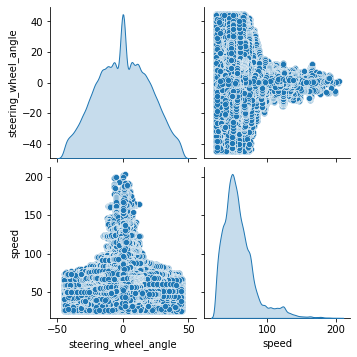

In [16]:
multi_train_dataset.pairplot()

In [17]:
len(multi_train_dataset)

8561

In [18]:
val_datasets = []
for val_dataset_path in val_dataset_paths:
    val_dataset = RoadDataset(val_dataset_path[0], val_dataset_path[1], column_names, batch_size=my_batch_size)
    val_dataset.set_lateral_shift_range(0)
    val_dataset.clean()
    print()
    if len(val_dataset) > 0:
        val_datasets.append(val_dataset)
        

Reading csv file: ../notebooks/datasets/validation/Tag-Sonne-Wolken-Ausserorts/Tag-Sonne-Wolken-Ausserorts.csv
Loaded dataset with 10474 samples
Cleaning dataset. Starting with 10474 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 1070 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 676 rows for reason: Low speed (< 25 km/h)
Removing 66 rows for reason: Left blinker on
Removing 168 rows for reason: Right blinker on
8494 samples remaining.

Reading csv file: ../notebooks/datasets/validation/Nacht-Schneechaos/Nacht-Schneechaos.csv
Loaded dataset with 7527 samples
Cleaning dataset. Starting with 7527 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 1107 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 1056 rows for reason: Low speed (< 25 km/h)
Removing 14 rows for reason: Left blinker on
Removing 39 rows for reason: Ri

In [19]:
len(val_datasets)

2

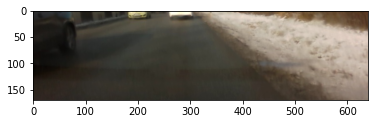

Vel: 43.833999999999996 km/h, SWA: 0.16834793188147623 deg


In [20]:
import matplotlib.pyplot as plt
batch = multi_train_dataset[0]
samples = batch[0]
labels = batch[1]

images = samples[0]
velocities = samples[1]



image = images[0]
vel = velocities[0]
swa = labels[0]
swa = multi_train_dataset.denormalize_swa(swa)
plt.figure()
plt.imshow(image)
plt.grid(False)
plt.show()
print("Vel: {} km/h, SWA: {} deg".format(vel*250, swa))

In [21]:
from tensorflow.keras import Model, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import concatenate, ELU, Conv2D, MaxPooling2D, Dense, Flatten, Lambda, Dropout, BatchNormalization

ch, row, col = 3, 170, 640

frame_input = Input(shape=(row, col, ch), name='frame_in')
velocity_input = Input(shape=(1,), name='velocity_in')

# Image branch
x = Lambda(lambda x: x/127.5 - 1., input_shape=(row, col, ch), output_shape=(row, col, ch), name='frame_normalize')(frame_input)
x = MaxPooling2D(pool_size=(2,3), strides=(2,3), padding='valid', name='frame_downsample')(x)
    
x = Conv2D(filters=24, kernel_size=(5,5), strides=(3,3), activation='elu')(x)
#x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(x)
    
x = Conv2D(filters=36, kernel_size=(5,5), strides=(3, 3), activation='elu')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(x)
    
#x = Conv2D(filters=48, kernel_size=(5,5), strides=(2, 2), activation='elu')(x)

#x = Conv2D(filters=64, kernel_size=(3,3), strides=(2, 1), activation='elu')(x)

x = Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), activation='elu')(x)
#x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(x)

x = Flatten()(x)

x = Dense(50, activation='elu')(x)

x = Model(inputs=frame_input, outputs = x)

# Velocity branch
y = Dense(1, activation='linear')(velocity_input)
y = Model(inputs=velocity_input, outputs = y)


# Combine
combined = concatenate([x.output, y.output])

#combined = Dense(100, activation='elu')(combined)

#combined = Dense(50, activation='elu')(combined)

combined = Dense(10, activation='elu')(combined)

combined = Dense(1, activation='linear', name='swa_out')(combined)

model = Model(inputs=[x.input, y.input], outputs=combined)



model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [22]:
model_name = 'v17.9'
try:
    model = keras.models.load_model('./trained_models/' + model_name + '.h5')
except:
    print("Model not found. Training from scratch")

Model not found. Training from scratch


In [23]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
frame_in (InputLayer)           [(None, 170, 640, 3) 0                                            
__________________________________________________________________________________________________
frame_normalize (Lambda)        (None, 170, 640, 3)  0           frame_in[0][0]                   
__________________________________________________________________________________________________
frame_downsample (MaxPooling2D) (None, 85, 213, 3)   0           frame_normalize[0][0]            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 27, 70, 24)   1824        frame_downsample[0][0]           
____________________________________________________________________________________________

In [24]:
import numpy as np
import matplotlib.pylab as plt


def get_smoothness_score(series):
    
    def running_mean(x, N):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[N:] - cumsum[:-N]) / float(N)

    smooth = running_mean(series, 9)
    diff = series[4:-4] - smooth
    
    smoothness = 1/np.mean(np.abs(diff))
    print(smoothness)
    return smoothness

In [25]:
from tensorflow.keras.preprocessing.image import img_to_array
def dataset_thumbs(dataset):
    
    thumbs = 30
    frames = dataset.get_batch_size()*len(dataset)-1
    
    print("Dataset contains {} frames".format(frames))

    plt.figure(figsize=(15,75))
    for i in range(thumbs):
        
        # original frame
        framenr = frames//thumbs*i
        #print("Getting frame {}".format(framenr))
        sample = dataset.get_sample(framenr)
        frame = sample['frame']
        frame = frame/255
        
        plt.subplot(thumbs,3,i*3+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(frame)
        
        # augmented frame
        sample = dataset.get_sample(framenr, augment=True)
        aug_frame = sample['frame']
        aug_frame = aug_frame/255
        
        plt.subplot(thumbs,3,i*3+2)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(aug_frame)
        
        # cropped frame
        sample = dataset.get_sample(framenr, crop=True)
        cropped_frame = sample['frame']
        cropped_frame = cropped_frame/255
        
        plt.subplot(thumbs,3,i*3+3)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cropped_frame)
        
        
        
        
        #plt.xlabel(class_names[train_labels[i]])
    plt.show()

Predictions: [[-0.16672441]]
Ground-truth (deg): 22.41
Prediction (denormed swa (deg)): -1.896367991901633

Predictions: [[-0.12894353]]
Ground-truth (deg): -9.89
Prediction (denormed swa (deg)): -1.3498692371252101

Predictions: [[0.04580693]]
Ground-truth (deg): 17.78
Prediction (denormed swa (deg)): 0.40217577224913725

Predictions: [[0.09595386]]
Ground-truth (deg): -12.71
Prediction (denormed swa (deg)): 0.9357490043470298

Predictions: [[-0.24040323]]
Ground-truth (deg): -11.65
Prediction (denormed swa (deg)): -3.231824763580489

Starting Epoch 1 for all datasets
Dataset contains 136975 frames


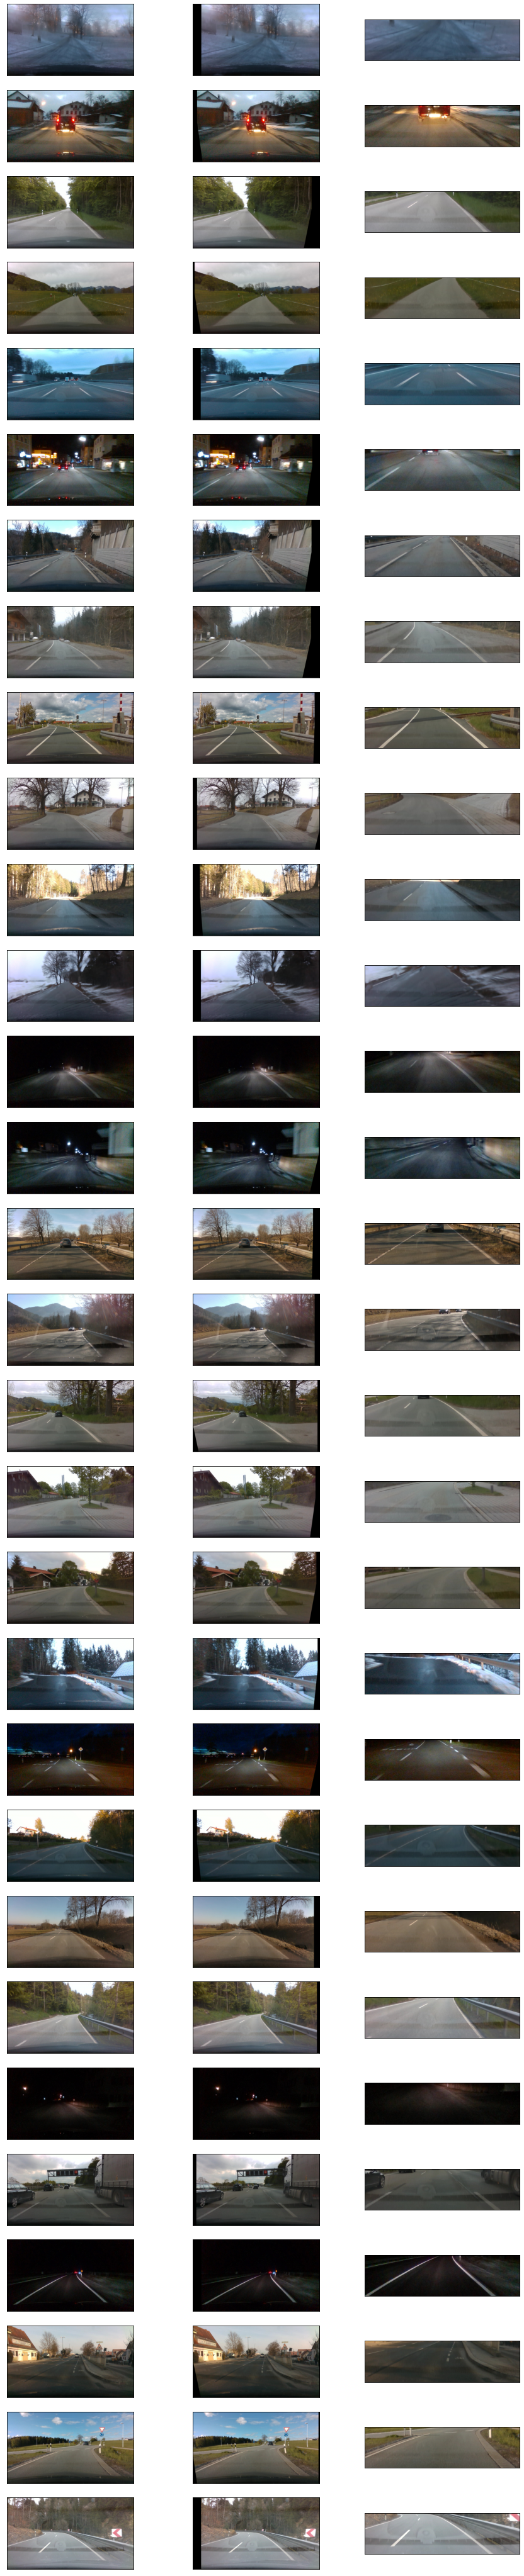

Dataset Mean Absolute Normalized SWA: 0.4799269526114152
8561/8561 [==============================] - 758s 89ms/step - loss: 0.0685 - mse: 0.0685 - mae: 0.1843
Model quality: 61.6%



Predictions: [[0.6483394]]
Ground-truth (deg): 3.82
Prediction (denormed swa (deg)): 24.749204740653987

Predictions: [[-0.13414018]]
Ground-truth (deg): -6.26
Prediction (denormed swa (deg)): -1.420230323312866

Predictions: [[-0.4108654]]
Ground-truth (deg): -15.46
Prediction (denormed swa (deg)): -8.346090983367008

Predictions: [[0.41372228]]
Ground-truth (deg): 16.34
Prediction (denormed swa (deg)): 8.46499928223153

Predictions: [[0.63062346]]
Ground-truth (deg): 14.46
Prediction (denormed swa (deg)): 22.919260532514425

Starting Epoch 2 for all datasets
8561/8561 [==============================] - 761s 89ms/step - loss: 0.0595 - mse: 0.0595 - mae: 0.1659
Model quality: 65.4%



Predictions: [[-0.2715792]]
Ground-truth (deg): -36.88
Prediction (denormed swa (deg)): -3.9266788939950423

Predictions: 

Predictions: [[0.34519863]]
Ground-truth (deg): 15.28
Prediction (denormed swa (deg)): 5.956122083486851

Predictions: [[0.43031418]]
Ground-truth (deg): 12.15
Prediction (denormed swa (deg)): 9.183102274086105

Starting Epoch 13 for all datasets
8561/8561 [==============================] - 733s 86ms/step - loss: 0.0482 - mse: 0.0482 - mae: 0.1440
Model quality: 70.0%



Predictions: [[0.59880304]]
Ground-truth (deg): 7.58
Prediction (denormed swa (deg)): 19.94105093306378

Predictions: [[-0.56836]]
Ground-truth (deg): -19.16
Prediction (denormed swa (deg)): -17.42550832960867

Predictions: [[-0.06659999]]
Ground-truth (deg): 0.44
Prediction (denormed swa (deg)): -0.6105140609292348

Predictions: [[0.18538478]]
Ground-truth (deg): -6.82
Prediction (denormed swa (deg)): 2.1983277919468103

Predictions: [[-0.5684048]]
Ground-truth (deg): -19.91
Prediction (denormed swa (deg)): -17.428991456220462

Starting Epoch 14 for all datasets
8561/8561 [==============================] - 734s 86ms/s

Predictions: [[-0.11602171]]
Ground-truth (deg): -1.44
Prediction (denormed swa (deg)): -1.1811221476839475

Predictions: [[0.0912469]]
Ground-truth (deg): -16.47
Prediction (denormed swa (deg)): 0.8809923256836192

Starting Epoch 25 for all datasets
8561/8561 [==============================] - 734s 86ms/step - loss: 0.0445 - mse: 0.0445 - mae: 0.1432
Model quality: 70.2%



Predictions: [[-0.28925595]]
Ground-truth (deg): -3.76
Prediction (denormed swa (deg)): -4.360906941551814

Predictions: [[-0.4396454]]
Ground-truth (deg): -24.48
Prediction (denormed swa (deg)): -9.608398199701448

Predictions: [[-0.29586872]]
Ground-truth (deg): -23.73
Prediction (denormed swa (deg)): -4.531404986658713

Predictions: [[0.4633336]]
Ground-truth (deg): 31.99
Prediction (denormed swa (deg)): 10.762122541231575

Predictions: [[0.19991615]]
Ground-truth (deg): 24.48
Prediction (denormed swa (deg)): 2.449589288255696

Starting Epoch 26 for all datasets
8561/8561 [==============================] - 738s 

KeyboardInterrupt: 

In [26]:
epochs = 200

qualities = dict()


for epoch in range(epochs):
    
    # Predict a couple as a sanity check
    for i in range(5):
        frame_cnt = multi_train_dataset.get_batch_size()*len(multi_train_dataset)-1
        sample_idx = random.randint(0, frame_cnt)
        sample = multi_train_dataset.get_sample(sample_idx, augment=False, crop=True, normalize=False)
        cropped_frame = sample['frame']
        actual_swa = sample['swa']
        v_vehicle = sample['v_vehicle']
        blink_l = sample['blink_l']
        blink_r = sample['blink_r']
        timestamp = sample['filename']
        
        #cropped_frame = np.zeros_like(cropped_frame)
        #v_vehicle = 0
        #actual_swa = 0.5

        test_data = [np.array([cropped_frame]), np.array([v_vehicle/250])]
        predictions = model.predict(test_data)

        #predicted_swa = val_set.denormalize_swa(predictions[0][0])
        predicted_swa = predictions[0][0]
        denormed_pred_swa = multi_train_dataset.denormalize_swa(predicted_swa)
        print("Predictions: " + str(predictions))
        print("Ground-truth (deg): " +str(actual_swa))
        print("Prediction (denormed swa (deg)): " + str(denormed_pred_swa))
        print()
        
    print("Starting Epoch {} for all datasets".format(epoch+1))
    qualities["epoch-" + str(epoch)] = dict()
    
    naive_norm_mae = multi_train_dataset.get_mean_absolute_normalized_swa()
    if epoch == 0:
        dataset_thumbs(multi_train_dataset)
        print("Dataset Mean Absolute Normalized SWA: {}".format(naive_norm_mae))
    hist = model.fit(multi_train_dataset, epochs=1, verbose=1, workers=4)#, use_multiprocessing=False, workers=1)
    model.save('./trained_models/' + model_name + "_epoch_" + str(epoch+1) + '.h5')
    
    
    model_mae = hist.history['mae'][-1]

    quality = 1 - (model_mae/naive_norm_mae)
    qualities["epoch-" + str(epoch)] = quality
    print("Model quality: {:.1f}%".format(100*quality))
        
    
        
    print()
    #i = 1
    #for val_set in val_sets:
    #    loss = model.evaluate(val_set, verbose=1)
    #    predictions = model.predict(val_set, verbose=1)
    #    predictions_degrees = [x[0]*90 for x in predictions.tolist()]
    #    get_smoothness_score(predictions_degrees)
    #    #print("Validation Set {} loss: {}".format(i, loss))
    #    i+=1
        
    print()
    print()
    